<a href="https://colab.research.google.com/github/Raghavardhini/Raghavardhini/blob/main/hierarchicalcluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataset = pd.read_csv("/content/ipl.csv")
dataset

,os,Teams,Matches,Won,Lost,Tied,NR,Points,NRR,Series Form
0,1,Kolkata Knight Riders,3,3,0,0,0,6,2.518,WWW
1,2,Rajasthan Royals,3,3,0,0,0,6,1.249,WWW
2,3,Chennai Super Kings,4,2,2,0,0,4,0.517,LLWW
3,4,Lucknow Super Giants,3,2,1,0,0,4,0.483,WWL
4,5,Sunrisers Hyderabad,4,2,2,0,0,4,0.409,WLWL
5,6,Punjab Kings,4,2,2,0,0,4,-0.220,WLLW
6,7,Gujarat Titans,4,2,2,0,0,4,-0.580,LWLW
7,8,Royal Challengers Bengaluru,4,1,3,0,0,2,-0.876,LLWL
8,9,Delhi Capitals,4,1,3,0,0,2,-1.347,LWLL
9,10,Mumbai Indians,3,0,3,0,0,0,-1.423,LLL


In [6]:
dataset.shape


(10, 10)

In [7]:
dataset.head()

,os,Teams,Matches,Won,Lost,Tied,NR,Points,NRR,Series Form
0,1,Kolkata Knight Riders,3,3,0,0,0,6,2.518,WWW
1,2,Rajasthan Royals,3,3,0,0,0,6,1.249,WWW
2,3,Chennai Super Kings,4,2,2,0,0,4,0.517,LLWW
3,4,Lucknow Super Giants,3,2,1,0,0,4,0.483,WWL
4,5,Sunrisers Hyderabad,4,2,2,0,0,4,0.409,WLWL


In [8]:
x = dataset.iloc[:, [3, 4]].values

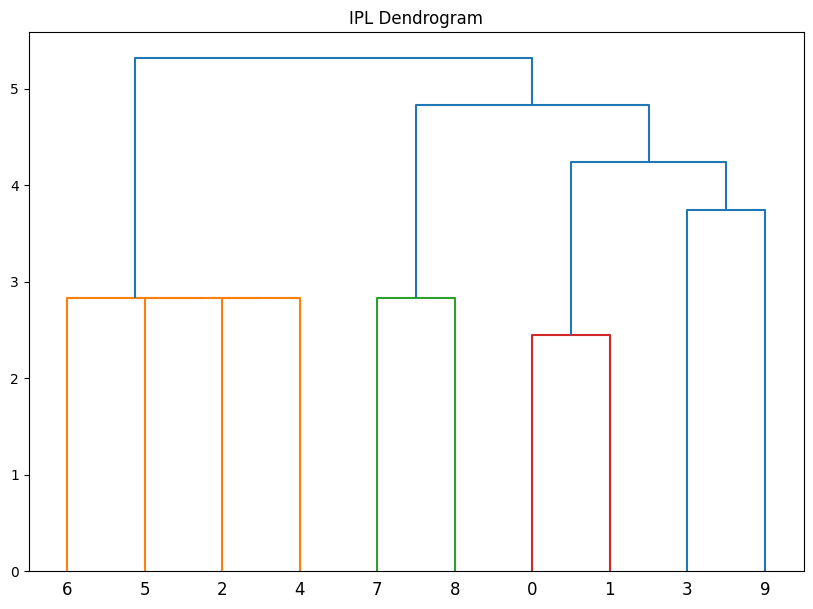

In [9]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(dataset).toarray()
plt.figure(figsize=(10, 7))
plt.title("IPL Dendrogram")
dend = shc.dendrogram(shc.linkage(data_encoded, method='ward'))

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
y_pred= hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
y_pred

array([9, 7, 8, 4, 3, 1, 6, 5, 2, 0])

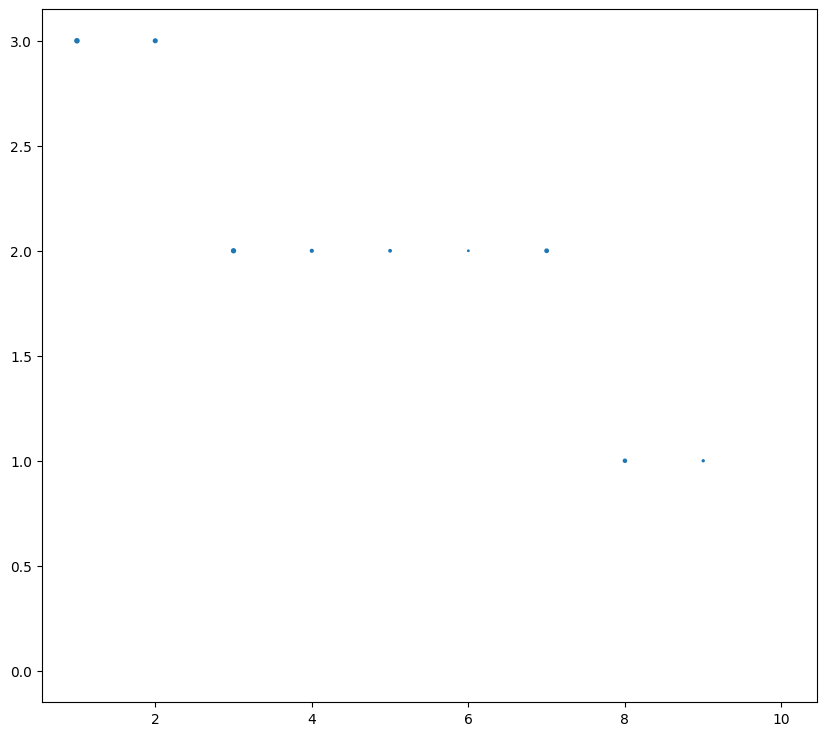

In [31]:

plt.figure(figsize=(10, 9))
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,3],  y_pred)
plt.show()